In [9]:
# 3 observations
# [Output 35] - Mouse g989 has multiple Timepoints
# Barchart 51 and 54 - More mice were treated with Capomulin that other drugs, througout  the study
# Scatter plot 78 - There is a strong positive correlation between the variables wieght and tumor volume
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [11]:
# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

In [30]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# merge into a new dat frame
combined_data = pd.merge(study_results, mouse_metadata, how='left', on = 'Mouse ID')
#how=left - all results from first files will be matched with other file
# we picked Mouse ID because this colmn is ib both files
# merge - you merge 'on'something
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [32]:
#Observations and Insights...
# Checking the number of mice
# Any given mouse has a number of points
# Use ''.unique'
len(combined_data['Mouse ID'].unique())
#without len you get all micepoints. with len we get number of mice

249

In [35]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Mouse ID is in data set multiple times
#find mice with multiple timepionts - bad data i.e.
# ''.loc' will filter out rows
# duplicated rows
# we are looking for duplivcate data in Mouse ID and TimePoint together
# We want to see the Mouse Id that is the duplicate 
# in the loc[row, column]
# .unique will print the Mouse ID once
#without .unique you get a list
duplicate_mice = combined_data.loc[combined_data.duplicated(subset = ["Mouse ID", 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice[0]
#Mouse g989 had duplicate Mouse IDs
#[0] above is the first index in an array

'g989'

In [37]:
# Optional: Get all the data for the duplicate mouse ID.
#trying to get a dataframe just for this mouse ID
#keep = False keps all
duplicate_mouse = combined_data[combined_data.duplicated(['Mouse ID','Timepoint'],keep = False)]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# To create a clean dataframe take from the combined data, any mice that are not g989
# != means not equal to
clean_dataframe = combined_data.loc[(combined_data['Mouse ID']!='g989')]
clean_dataframe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [40]:
 # Checking the number of mice in the clean DataFrame.
len(clean_dataframe['Mouse ID'].unique())

248

In [44]:
# Summary Statistics...
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_data = clean_dataframe.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
mean_data
median_data = clean_dataframe.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
median_data
variance_data = clean_dataframe.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
variance_data
std_data = clean_dataframe.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
std_data
SEM_data = clean_dataframe.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']
SEM_data
summary_dataframe = pd.DataFrame({"Mean":mean_data,
                                 "Median":median_data, 
                                 "Variance": variance_data,
                                 "std":std_data,
                                 "SEM":SEM_data})
summary_dataframe 
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby functionsummary_dataframenew = clean_dataframe.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_dataframenew

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

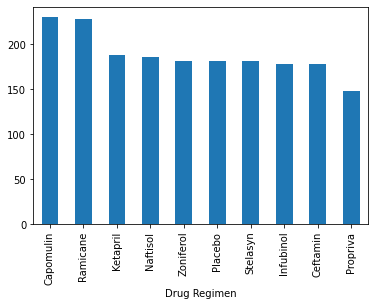

In [51]:
#Bar and Pie Charts...
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#Barchart on Drug Regimen
#no.of metnions of drug regiman 
drug_regimen = clean_dataframe['Drug Regimen'].value_counts()
drug_regimen.plot(kind = 'bar')
#to show the Lable Drig Regimen
plt.xlabel('Drug Regimen')
plt.show()

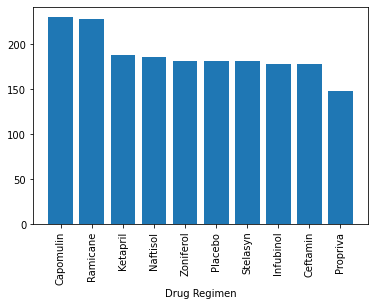

In [54]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Here we will use Matplotlib
plt.bar(drug_regimen.index.values, drug_regimen.values)
#ticks ar the labels
plt.xticks(rotation=90)
drug_regimen
plt.xlabel('Drug Regimen')
plt.show()

<AxesSubplot:ylabel='Sex'>

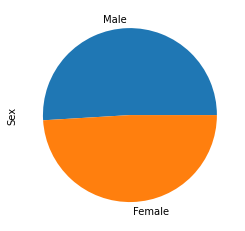

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_female = clean_dataframe['Sex'].value_counts()
male_female.plot(kind ='pie')

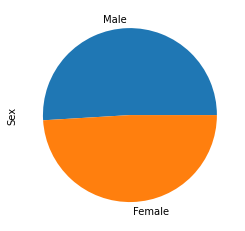

In [58]:
 # Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(male_female.values,labels=male_female.index.values)
plt.ylabel('Sex')
plt.show()

In [65]:
#Quartiles Outliers and Box Plots... 
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

#Take max based in mouse id and timepoint
max_tumorvolume = clean_dataframe.groupby(["Mouse ID"])['Timepoint'].max()
max_tumorvolume = max_tumorvolume.reset_index()
print (max_tumorvolume)
# Here we have the last timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_dataframe = max_tumorvolume.merge(clean_dataframe,on = ['Mouse ID','Timepoint'],how='left')
merged_dataframe


    Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
243     z435         10
244     z578         45
245     z581         45
246     z795         45
247     z969         45

[248 rows x 2 columns]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [67]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    final_tumor = merged_dataframe.loc[merged_dataframe['Drug Regimen']==drug,'Tumor Volume (mm3)']
    drug_volumes.append(final_tumor)

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of final_tumor is: {lowerq}")
    print(f"The upper quartile of final_tumor is: {upperq}")
    print(f"The interquartile range of final_tumor is: {iqr}")
    print(f"The the median of final_tumor is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of final_tumor is: 32.37735684
The upper quartile of final_tumor is: 40.1592203
The interquartile range of final_tumor is: 7.781863460000004
The the median of final_tumor is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of final_tumor is: 31.56046955
The upper quartile of final_tumor is: 40.65900627
The interquartile range of final_tumor is: 9.098536719999998
The the median of final_tumor is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of final_tumor is: 54.04860769
The upper quartile of final_tumor is: 65.52574285
The interquartile range of final_tumor is: 11.477135160000003
The the median of final_tumor is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of final_tumor is: 48.72207785
The upper quartile of final_tu

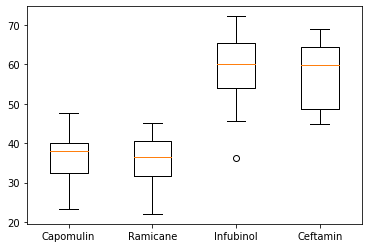

In [68]:
 # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(drug_volumes, labels = drug_list)
plt.show()

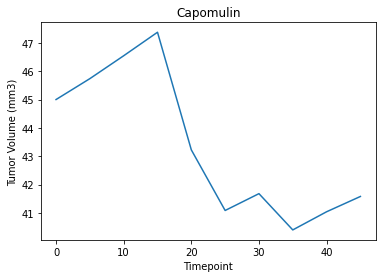

In [71]:
# Line and Scatter Plots ...
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#gives us the rows that are contain capomulim
capomulin_data = clean_dataframe.loc[clean_dataframe['Drug Regimen'] == 'Capomulin']
mouse_data = capomulin_data.loc[capomulin_data['Mouse ID'] == 'r944']
plt.plot(mouse_data["Timepoint"],mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin')
plt.show()

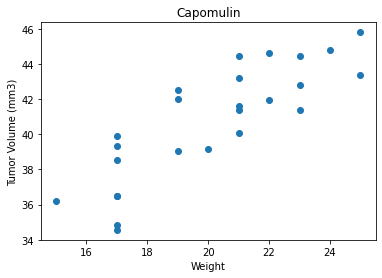

In [72]:
 # Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = clean_dataframe.loc[clean_dataframe['Drug Regimen'] == 'Capomulin']
# we are doing an average below so we use groupby and then apply the function .mean()
mouse_average = capomulin_data.groupby(['Mouse ID']).mean()
plt.scatter(mouse_average["Weight (g)"],mouse_average['Tumor Volume (mm3)'])
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin')
plt.show()

The correlation coefficient between weight and tumor volume is 0.84


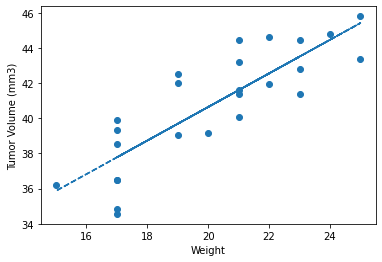

In [78]:
#Correlation and Regresssion... 
# Calculate the correlation coefficient and linear regression model 
#this below is part of the library re; correlagtion coefficient
print(f"The correlation coefficient between weight and tumor volume is {round(st.pearsonr(mouse_average['Weight (g)'],mouse_average['Tumor Volume (mm3)'])[0],2)}")
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(mouse_average["Weight (g)"], mouse_average['Tumor Volume (mm3)'])
m_fit = m_slope * mouse_average["Weight (g)"] + m_int
plt.scatter(mouse_average["Weight (g)"],mouse_average['Tumor Volume (mm3)'])
plt.plot(mouse_average['Weight (g)'],m_fit,"--")
#plot x-axis
plt.xlabel('Weight')
# y axis plot
plt.ylabel('Tumor Volume (mm3)')
#pritn to screen
plt.show()
# for mouse weight and average tumor volume for the Capomulin regimen